# Estatísticas Descritivas e Tratamento dos Dados

In [1]:
#pip install pyodbc
# importar bibliotecas
import pandas as pd
import numpy as np
import io

## 2.1 ESTATISTICAS DESCRITIVAS

In [2]:
#Importa arquivo final do tratamento de dados
IND_FINAL   = pd.read_excel(r'C:\Users\alesa\OneDrive - ANVISA - Agencia Nacional de Vigilancia Sanitaria\000_ECD\TCC\Dados\IND_FINAL.xlsx',
                         header=0, sheet_name="Planilha1")
assuntos = pd.read_excel(r'C:\Users\alesa\OneDrive - ANVISA - Agencia Nacional de Vigilancia Sanitaria\GGTOX\3.INDICADORES\assuntos.xls',
                         header=0, sheet_name="ASSUNTOS")

In [4]:
# Selecionando variáveis de interesse
IND_FINAL_0 = IND_FINAL[[#'SAIDA_A',
                       #'SAIDA_M',
                       #'ENTRADA_A',
                       #'ENTRADA_M',
                       'CO_ASSUNTO',
                       #'NU_PROCESSO',
                       'NU_EXPEDIENTE',
                       'RECURSO',
                       'CANCELADO',
                       'DT_FINALIZACAO',
                       'DT_ENTRADA',
                       #'DT_INICIO_SITUACAO',
                       #'DT_FIM_SITUACAO',
                       'CICLO_GGTOX',
                       'DIAS',
                       #'NU_CNPJ_EMPRESA',
                       #'NO_RAZAO_SOCIAL_EMPRESA',
                       #'NO_PRODUTO',
                       #'TIPO_PUBLICACAO',
                       #'DT_FIM_SITUACAO_LAG'
                       ]]

IND_FINAL_0 = pd.DataFrame(IND_FINAL_0[(IND_FINAL_0['CICLO_GGTOX'] == "3.1.Analise") |
                               (IND_FINAL_0['CICLO_GGTOX'] == '6.Tempo_total')]) 

IND_FINAL_0 = pd.DataFrame(IND_FINAL_0[(IND_FINAL_0['CICLO_GGTOX'] == "6.Tempo_total") ]) 


IND_FINAL_0 = pd.DataFrame(IND_FINAL_0[(IND_FINAL_0['CO_ASSUNTO'] == 5065) |
                               (IND_FINAL_0['CO_ASSUNTO'] == 5041)]) 

# Transformando Recurso e Cancelado maior que 1 em 1
IND_FINAL_0['RECURSO'] = np.where((IND_FINAL_0['RECURSO'] >= 1), 1, 0)
IND_FINAL_0['CANCELADO'] = np.where((IND_FINAL_0['CANCELADO'] >= 1), 1, 0)

IND_FINAL_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3447 entries, 2727 to 33048
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CO_ASSUNTO      3447 non-null   int64         
 1   NU_EXPEDIENTE   3447 non-null   int64         
 2   RECURSO         3447 non-null   int32         
 3   CANCELADO       3447 non-null   int32         
 4   DT_FINALIZACAO  3447 non-null   datetime64[ns]
 5   DT_ENTRADA      3447 non-null   datetime64[ns]
 6   CICLO_GGTOX     3447 non-null   object        
 7   DIAS            3447 non-null   int64         
dtypes: datetime64[ns](2), int32(2), int64(3), object(1)
memory usage: 215.4+ KB


In [5]:
# Transpor os dados e gerando as duas bases de 5041 e 5065

df_transposed = IND_FINAL_0.pivot_table(index=['CO_ASSUNTO', 'NU_EXPEDIENTE', 'RECURSO','CANCELADO',
                                     'DT_ENTRADA','DT_FINALIZACAO'],
                               columns='CICLO_GGTOX',
                               values='DIAS').reset_index()

# Renomear as colunas resultantes
df_transposed.columns.name = None

# Renomear as colunas adicionando um prefixo
df_transposed = df_transposed.rename(columns=lambda x: '' + str(x))

df_transposed.rename(columns={'3.1.Analise': 'ANALISE'}, inplace=True)
df_transposed.rename(columns={'6.Tempo_total': 'TOTAL'}, inplace=True)

assunto_tipo = assuntos[['CO_ASSUNTO','TIPO_PUBLICACAO']]
                       
df_transposed = df_transposed.merge(assunto_tipo, on="CO_ASSUNTO", how="left")
df_transposed = pd.DataFrame(df_transposed[(df_transposed['TIPO_PUBLICACAO'] == "1. Registro")]) 
df_transposed = df_transposed.drop(['TIPO_PUBLICACAO'], axis=1)
#df_transposed.head()
#df_transposed.info()

df_41 = pd.DataFrame(df_transposed[(df_transposed['CO_ASSUNTO'] == 5041)]) 
df_65 = pd.DataFrame(df_transposed[(df_transposed['CO_ASSUNTO'] == 5065)]) 

df_41.head()

,CO_ASSUNTO,NU_EXPEDIENTE,RECURSO,CANCELADO,DT_ENTRADA,DT_FINALIZACAO,TOTAL
0,5041,78067,0,1,2005-12-22 14:39:27,2012-09-24 16:12:43,2468
1,5041,594111,1,1,2011-01-03 00:00:00,2015-12-02 16:56:27,1794
2,5041,1092088,0,1,2007-11-09 12:31:34,2015-12-02 16:56:28,2945
3,5041,1248153,0,0,2014-12-22 00:00:00,2021-07-28 12:03:18,2410
4,5041,1251153,0,0,2014-12-22 00:00:00,2016-01-25 00:00:00,399


In [6]:
#Verificando nulos
df_transposed.isnull().sum()

CO_ASSUNTO        0
NU_EXPEDIENTE     0
RECURSO           0
CANCELADO         0
DT_ENTRADA        0
DT_FINALIZACAO    0
TOTAL             0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

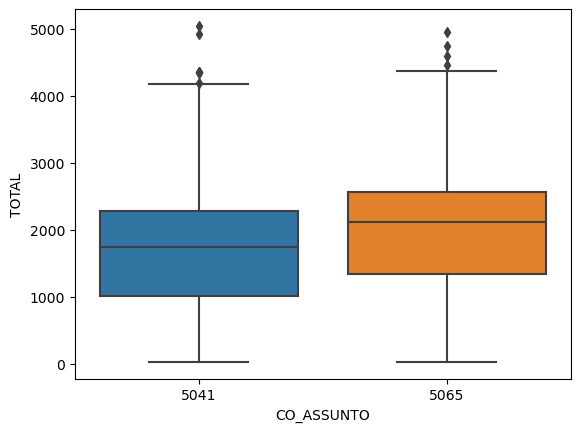

In [8]:
#Boxplot por categoria
sns.boxplot(x="CO_ASSUNTO", 
            y="TOTAL",
            data=df_transposed)
plt.show()

C:\Users\alesa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


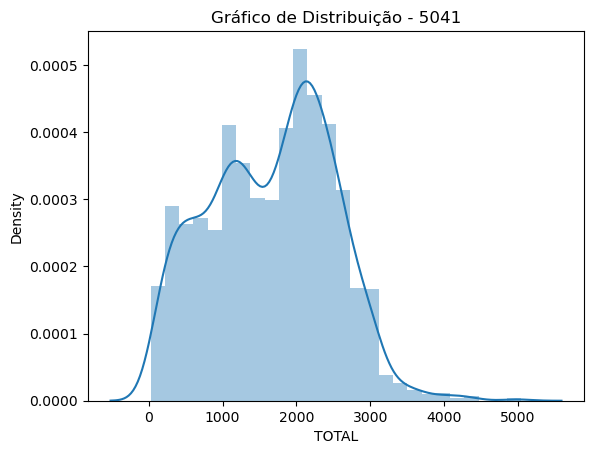

In [9]:
sns.distplot(df_41['TOTAL'])
plt.title('Gráfico de Distribuição - 5041')
plt.show()

C:\Users\alesa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


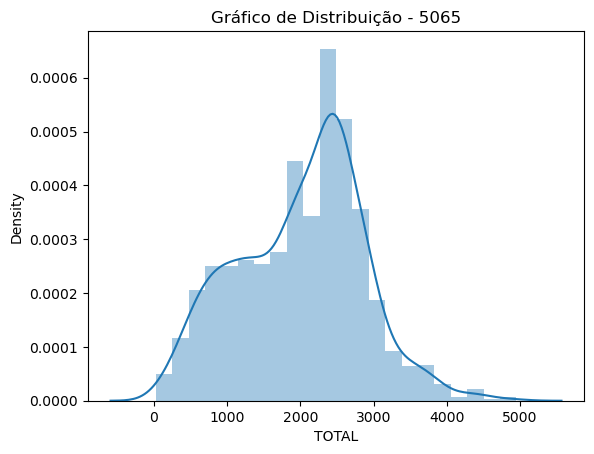

In [10]:
sns.distplot(df_65['TOTAL'])
plt.title('Gráfico de Distribuição - 5065')
plt.show()

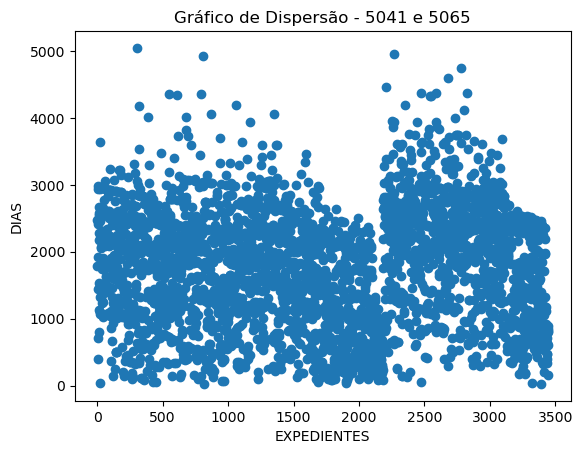

In [12]:
# Gráfico de Dispersão

# Crie o gráfico de dispersão
plt.scatter(df_transposed.index, df_transposed['TOTAL'])

# Adicione rótulos aos eixos x e y
plt.xlabel('EXPEDIENTES')
plt.ylabel('DIAS')

# Adicione um título ao gráfico
plt.title('Gráfico de Dispersão - 5041 e 5065')

# Exiba o gráfico
plt.show()

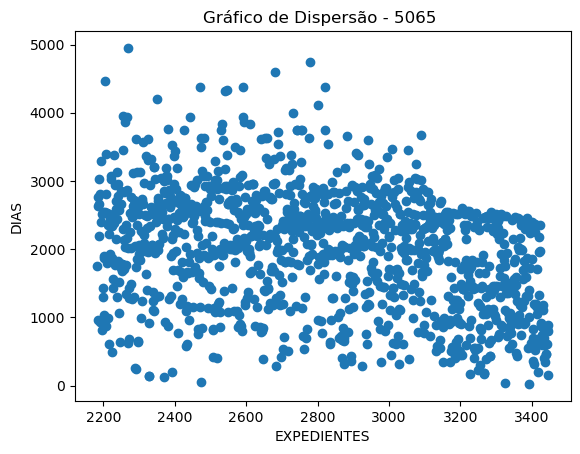

In [19]:
# Gráfico de Dispersão

# Crie o gráfico de dispersão
plt.scatter(df_65.index, df_65['TOTAL'])

# Adicione rótulos aos eixos x e y
plt.xlabel('EXPEDIENTES')
plt.ylabel('DIAS')

# Adicione um título ao gráfico
plt.title('Gráfico de Dispersão - 5065 ')

# Exiba o gráfico
plt.show()


In [20]:
descricao_coluna = df_41['TOTAL'].describe()
print(descricao_coluna)

count    2183.000000
mean     1658.516720
std       840.037997
min        25.000000
25%      1016.500000
50%      1748.000000
75%      2285.000000
max      5046.000000
Name: TOTAL, dtype: float64


In [21]:
descricao_coluna = df_65['TOTAL'].describe()
print(descricao_coluna)

count    1264.000000
mean     2004.803797
std       857.523381
min        26.000000
25%      1338.500000
50%      2110.000000
75%      2568.250000
max      4950.000000
Name: TOTAL, dtype: float64


## Detecção de anomalias - Outliers

In [22]:
#outliers semana 12 - detecção de anomalias
#importar bibliotecas
from sklearn.ensemble import IsolationForest

In [23]:
#df_transposed = pd.DataFrame(df_transposed[(df_transposed['CO_ASSUNTO'] == 5041)]) 

#Definir modelo de Isolation Forest - SOMENTE TOTAL
modelo=IsolationForest(n_estimators=100,max_samples='auto',random_state=0)
#Visualizar parâmetros do modelo
print(modelo.get_params())

variaveis_anomalia = ['TOTAL']

#Ajustar modelo multivariado
modelo.fit(df_transposed[variaveis_anomalia])

#Criar coluna chamada score
df_transposed['scores'] = modelo.decision_function(df_transposed[variaveis_anomalia])

df_transposed.info()

{'bootstrap': False, 'contamination': 'auto', 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 0, 'verbose': 0, 'warm_start': False}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3447 entries, 0 to 3446
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CO_ASSUNTO      3447 non-null   int64         
 1   NU_EXPEDIENTE   3447 non-null   int64         
 2   RECURSO         3447 non-null   int64         
 3   CANCELADO       3447 non-null   int64         
 4   DT_ENTRADA      3447 non-null   datetime64[ns]
 5   DT_FINALIZACAO  3447 non-null   datetime64[ns]
 6   TOTAL           3447 non-null   int64         
 7   scores          3447 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(5)
memory usage: 242.4 KB


In [24]:
#Definir modelo de Isolation Forest - CO_ASSUNTO e TOTAL
modelo=IsolationForest(n_estimators=100,max_samples='auto',random_state=0)
#Visualizar parâmetros do modelo
print(modelo.get_params())

colunas_analise = ['TOTAL']

#Ajustar modelo multivariado
modelo.fit(df_transposed[colunas_analise])

#Criar coluna chamada score
df_transposed['scores'] = modelo.decision_function(df_transposed[colunas_analise])

df_transposed.head()



{'bootstrap': False, 'contamination': 'auto', 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 0, 'verbose': 0, 'warm_start': False}


,CO_ASSUNTO,NU_EXPEDIENTE,RECURSO,CANCELADO,DT_ENTRADA,DT_FINALIZACAO,TOTAL,scores
0,5041,78067,0,1,2005-12-22 14:39:27,2012-09-24 16:12:43,2468,0.045341
1,5041,594111,1,1,2011-01-03 00:00:00,2015-12-02 16:56:27,1794,0.043567
2,5041,1092088,0,1,2007-11-09 12:31:34,2015-12-02 16:56:28,2945,-0.014113
3,5041,1248153,0,0,2014-12-22 00:00:00,2021-07-28 12:03:18,2410,0.043941
4,5041,1251153,0,0,2014-12-22 00:00:00,2016-01-25 00:00:00,399,-0.020407


In [28]:
df_transposed.to_excel('anomalias.xlsx', sheet_name='Planilha1', index=False)

In [ ]:
# Exportando arquivo final para a modelagem
#TESTE.to_excel('TESTE.xlsx', sheet_name='Planilha1', index=False)
df.to_excel('df.xlsx', sheet_name='Planilha1', index=False)